# Bode Simulation Example

In this example, we run a **BODE** simulation of an ideal buck (step-down) model.

This is the same code saved in the **40_Bode.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df

This takes a time!

In [1]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import cmath
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "Buck_COT_Bode"

run = pqs(fname)

if not run.ts['cir']:
    run.qsch2cir()
if not run.ts['qraw']:
    run.cir2qraw()

run.setNline(499)

df = run.LoadQRAW(["OpenLoopGain"])

def CalcGainPhase(row):
    row["gain"] = 20*math.log10(abs(row["OpenLoopGain"]))
    row["phase"] = math.degrees(cmath.phase(row["OpenLoopGain"]))
    return row
df = df.apply(CalcGainPhase, axis=1)

run.comp2real(df, ["Step", "gain", "phase", run.sim['Xlbl']])

print(df)

              Freq            OpenLoopGain  Step       gain      phase
0      1000.000000  158.796585+197.700275j   0.0  48.082228  51.227913
1      1009.271515  157.046410+194.137866j   0.0  47.948580  51.029125
2      1018.628990  155.428927+190.729696j   0.0  47.820135  50.822814
3      1028.073224  153.961383+187.394511j   0.0  47.695310  50.593830
4      1037.605020  152.593739+184.031053j   0.0  47.570335  50.335365
..             ...                     ...   ...        ...        ...
495   96375.786638    0.122220+  0.209995j   0.0 -12.288841  59.799998
496   97269.336154    0.120309+  0.193484j   0.0 -12.847474  58.126460
497   98171.170228    0.118536+  0.182949j   0.0 -13.231120  57.060000
498   99081.365669    0.117331+  0.177337j   0.0 -13.447193  56.510289
499  100000.000000    0.116746+  0.175291j   0.0 -13.530402  56.335816

[500 rows x 5 columns]


Note that the gain calculation of "df = df.apply()" makes everything "complex". So we re-convert known "non-complex" data to "real".


## 2. Small Preparation for Plotting

In [2]:
#######
# Plot Default

mpl.rcParams.update([['font.sans-serif', ["Arial Rounded MT Bold", 'Arial Unicode MS', 'Arial', 'sans-serif']], ["mathtext.default", "rm"], ["legend.labelspacing", 0.1], ["legend.columnspacing", 0.2], ["legend.handletextpad", 0.3], ['axes.formatter.useoffset', False], ['xtick.minor.visible', True], ['ytick.minor.visible', True], ['grid.linewidth', 1],["savefig.dpi", 300], ["axes.unicode_minus", False]])

#######
# Plotting Pandas, AC

plt.close('all')
plt.style.use('ggplot')

## 3. Plotting

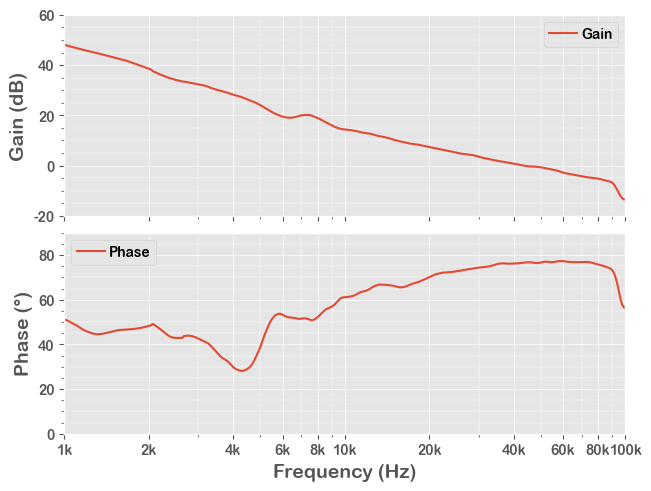

In [3]:
# Prepare a blank plotting area
fig2, (axT, axB) = plt.subplots(2,1,sharex=True,constrained_layout=True)

# Plot Bode (AC) curves
df.plot(ax=axB, x="Freq",  y="phase", label="Phase")
df.plot(ax=axT, x="Freq",  y="gain", label="Gain")

# Axis setup = begin =
axB.set_xscale('log')
axB.set_xlim(1e3,100e3)
axB.set_xticks([1e3,2e3,4e3,6e3,8e3,1e4,2e4,4e4,6e4,8e4,1e5],["1k","2k","4k","6k","8k","10k","20k","40k","60k","80k","100k"])

axT.set_ylim(-20,60)
axB.set_ylim(0,90)

axT.set_ylabel('Gain (dB)', fontsize=14)
axB.set_ylabel('Phase (°)', fontsize=14)
axB.set_xlabel('Frequency (Hz)', fontsize=14)

axB.grid(which='major', linewidth="0.5")
axB.grid(which="minor", linewidth="0.35")
axT.grid(which='major', linewidth="0.5")
axT.grid(which="minor", linewidth="0.35")

axT.minorticks_on()
axB.minorticks_on()
# Axis setup = begin =

# Save the Plot in PNG file
plt.savefig(run.path['base'] + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')
